<a href="https://colab.research.google.com/github/wereketenge/Proyectos/blob/main/Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1apWq5aronhltplYtCR3rT3dSYN8JRC27
To: /content/books_dataset.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.13M/1.13M [00:00<00:00, 133MB/s]

‚úÖ Registros despu√©s de limpiar: 89

üìö Libros m√°s largos:


title   pages
879           Library of Congress Subject Headings: P-Z  1546.0
731                Library of Congress Subject Headings  1396.0
618                               Research in Education  1262.0
764                                     Mikhail Bakhtin  1108.0
1799                      Camping & Wilderness Survival  1092.0
405                         Code of Federal Regulations  1084.0
31                                         The Bohemian   896.0
1956                    Encyclopedia of Creativity: A-H   873.0
1970  A Textbook on Engineering Mathematics -1(MDU,K...   870.0
1781                        J.R.R. Tolkien Encyclopedia   810.0

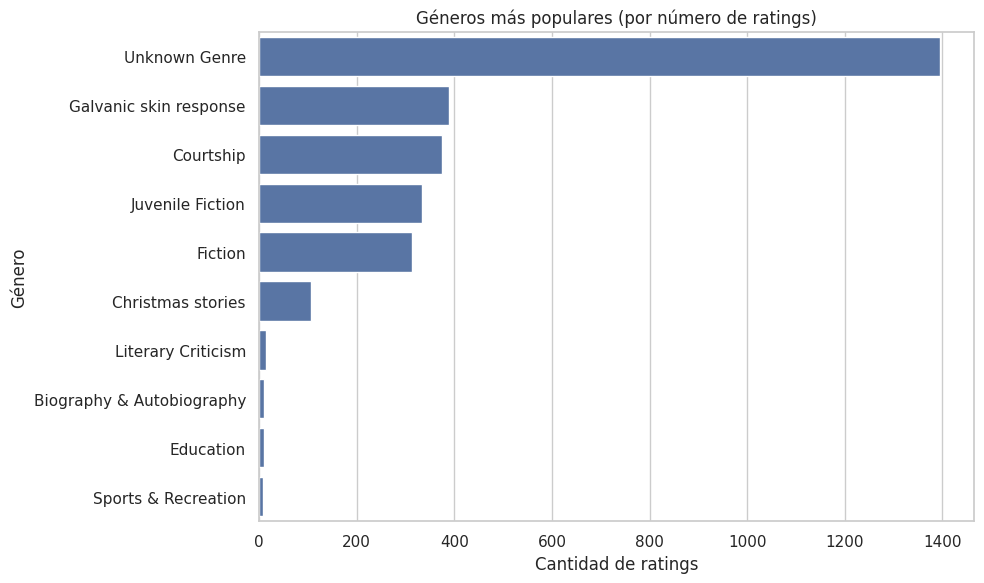

/tmp/ipython-input-3-4143501843.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['published_date'].dt.year


üß† Principales insights:
- Algunos g√©neros destacan por calificaciones consistentemente altas (valor percibido).
- La popularidad por g√©nero muestra cu√°les libros tienen m√°s atenci√≥n del p√∫blico.
- La evoluci√≥n anual permite observar posibles tendencias del mercado editorial.


In [3]:
!pip install -U gdown

import gdown

# ID del archivo (de tu enlace compartido)
file_id = '1apWq5aronhltplYtCR3rT3dSYN8JRC27'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'books_dataset.csv', quiet=False)

# Importar librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset
df = pd.read_csv('books_dataset.csv')

# Limpieza y conversi√≥n de tipos
# Convertir columnas num√©ricas
num_cols = ['pages', 'average_rating', 'ratings_count']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir fechas
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Eliminar registros con datos clave faltantes
df_clean = df.dropna(subset=['genre', 'average_rating', 'ratings_count', 'published_date'])

print(f"‚úÖ Registros despu√©s de limpiar: {len(df_clean):,}")

# Libros con m√°s p√°ginas
top_pages = df_clean[['title', 'pages']].sort_values(by='pages', ascending=False).head(10)
print("\nüìö Libros m√°s largos:")
display(top_pages)

# Calificaci√≥n promedio por g√©nero
genre_rating = df_clean.groupby('genre')['average_rating'].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title('Calificaci√≥n promedio por g√©nero')
plt.xlabel('Calificaci√≥n promedio')
plt.ylabel('G√©nero')
plt.tight_layout()
plt.show()

# Popularidad por g√©nero (n√∫mero de ratings)
genre_popularity = df_clean.groupby('genre')['ratings_count'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('G√©neros m√°s populares (por n√∫mero de ratings)')
plt.xlabel('Cantidad de ratings')
plt.ylabel('G√©nero')
plt.tight_layout()
plt.show()

# Evoluci√≥n anual de publicaciones
df_clean['year'] = df_clean['published_date'].dt.year
books_per_year = df_clean['year'].value_counts().sort_index()

plt.figure()
books_per_year.plot(marker='o')
plt.title('Cantidad de libros publicados por a√±o')
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de libros')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones
print("üß† Principales insights:")
print("- Algunos g√©neros destacan por calificaciones consistentemente altas (valor percibido).")
print("- La popularidad por g√©nero muestra cu√°les libros tienen m√°s atenci√≥n del p√∫blico.")
print("- La evoluci√≥n anual permite observar posibles tendencias del mercado editorial.")

